# **Hotel Bookings**

# **Project Overview** 

This project presents a structured exploratory data analysis of a travel booking dataset, performed to understand booking distribution, customer behavior patterns, and reservation dynamics across multiple business dimensions. The analysis was conducted using Python data analysis libraries, with a focus on transforming raw transactional data into visually interpretable insights that can support managerial decision-making.

The workflow began with data familiarization and preprocessing, where the dataset was examined for structural consistency, missing values, and categorical standardization. Date fields were processed to derive analytical time components such as booking day, month, and weekday. These derived features enabled multi-level temporal analysis and improved the interpretability of booking patterns.

Additionally, cancellation distribution was explored as one of several booking status outcomes to understand how reservation confirmations and reversals were distributed across properties, cities, and time periods.

Overall, the notebook transforms raw booking records into a comprehensive visual analytics dashboard, enabling stakeholders to view booking performance across operational, geographical, and temporal lenses. The project demonstrates how systematic exploratory analysis and well-structured visualizations can convert transactional datasets into actionable business intelligence for planning and performance monitoring.

### **Import Libraries** 

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt

#For not throwing any kinds of warnings
import warnings 
warnings.filterwarnings('ignore')

### **Load the dataset**


In [2]:
df = pd.read_csv(r'Hotel_bookings_final.csv', encoding = 'utf-8')

### **Dataset Information**

In [3]:
df.columns

Index(['customer_id', 'property_id', 'city', 'star_rating', 'booking_date',
       'check_in_date', 'check_out_date', 'room_type', 'num_rooms_booked',
       'stay_type', 'booking_channel', 'booking_value', 'costprice', 'markup',
       'selling_price', 'payment_method', 'refund_status', 'refund_amount',
       'channel_of_booking', 'booking_status', 'travel_date', 'cashback',
       'coupon_redeem', 'Coupon USed?'],
      dtype='object')

In [4]:
print ("Number of Rows =>", df.shape[0])
print ("Number of Columns =>", df.shape[1])

Number of Rows => 30000
Number of Columns => 24


In [5]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,25342,PayPal,Yes,369.65,Web,Confirmed,2024-03-04,5.37,0.00,No
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,8033,Bank Transfer,Yes,492.51,Web,Confirmed,2024-07-19,7.16,0.00,No
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,29715,Debit Card,Yes,0.00,iOS,Confirmed,2024-03-22,0.00,0.00,No
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,44592,Bank Transfer,Yes,545.54,Android,Confirmed,2024-11-24,7.93,24.50,Yes
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,15873,Debit Card,Yes,211.37,Web,Cancelled,2024-03-02,0.00,0.00,No


In [6]:
df.tail()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
29995,91,5,Boston,4,2025-04-29,2025-05-23,2025-05-24,Standard,1,Business,...,23365,Debit Card,Yes,286.66,Web,Confirmed,2024-10-05,0.00,0.00,No
29996,432,5,Los Angeles,4,2025-04-29,2025-06-24,2025-06-25,Deluxe,1,Leisure,...,22047,Bank Transfer,Yes,918.26,iOS,Confirmed,2024-10-22,0.00,0.00,No
29997,15,5,Boston,5,2025-04-29,2025-06-17,2025-06-20,Standard,1,Leisure,...,26321,PayPal,Yes,417.02,iOS,Confirmed,2024-10-22,0.00,2.58,Yes
29998,73,1,San Francisco,3,2025-04-29,NaN,NaN,Standard,1,Business,...,20806,Bank Transfer,Yes,468.35,Android,Cancelled,2024-10-15,6.81,0.00,No
29999,151,1,Los Angeles,3,2025-04-30,2025-05-15,2025-05-21,Standard,1,Leisure,...,27518,PayPal,Yes,784.54,Android,Confirmed,2024-10-12,11.41,0.00,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

### **Data Pre-Processing** 

In [8]:
#Checking Null Values
df.isnull().sum()

customer_id              0
property_id              0
city                     0
star_rating              0
booking_date             0
check_in_date         5468
check_out_date        5468
room_type                0
num_rooms_booked         0
stay_type                0
booking_channel          0
booking_value            0
costprice                0
markup                   0
selling_price            0
payment_method           0
refund_status            0
refund_amount            0
channel_of_booking       0
booking_status           0
travel_date              0
cashback                 0
coupon_redeem            0
Coupon USed?             0
dtype: int64

In [9]:
#No Duplicate Values
df.duplicated().sum()

0

In [10]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,25342,PayPal,Yes,369.65,Web,Confirmed,2024-03-04,5.37,0.00,No
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,8033,Bank Transfer,Yes,492.51,Web,Confirmed,2024-07-19,7.16,0.00,No
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,29715,Debit Card,Yes,0.00,iOS,Confirmed,2024-03-22,0.00,0.00,No
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,44592,Bank Transfer,Yes,545.54,Android,Confirmed,2024-11-24,7.93,24.50,Yes
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,15873,Debit Card,Yes,211.37,Web,Cancelled,2024-03-02,0.00,0.00,No


### **Outlier Detection**  

In [11]:
num_cols = df.select_dtypes(include = "number").columns.tolist()

In [12]:
num_cols

['customer_id',
 'property_id',
 'star_rating',
 'num_rooms_booked',
 'booking_value',
 'costprice',
 'markup',
 'selling_price',
 'refund_amount',
 'cashback',
 'coupon_redeem']

In [13]:
cols = 3 
rows = (len(num_cols) + cols - 1) // cols

In [14]:
plt.figure(figsize = (cols * 5, rows * 4))

<Figure size 1500x1600 with 0 Axes>

<Figure size 1500x1600 with 0 Axes>

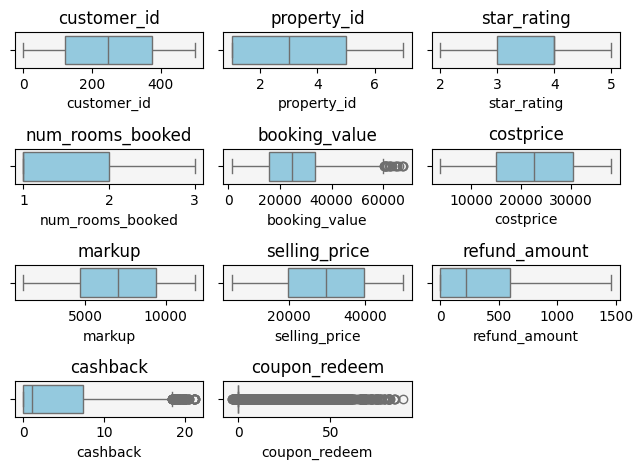

In [15]:
for i, col in enumerate (num_cols, 1):
    plt.subplot(rows, cols, i )
    sns.boxplot(data = df, x = col, color = 'skyblue')
    plt.title(col)
    plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

### **Major Outlier Detection Observation** 

#### - **booking_value** 
- Strong right-side outliers visible well beyond the upper whisker, around ~ 60,000rs +
- Indicates a small number of very high-value bookings compared to the bulk of transactions.
- Likely caused by Luxury Properties, Long Stays or Multiple Rooms

#### - **cashback**
- Upper-end outliers near ~ 20
- Most Cashbacks value cluster lower, rare points beyond upper whisker suggesting Promotional / Special Offers

#### - **refund_amount**
- Upper-end outlier whisker close to ~ 1,500rs
- Rare but decent amount refund, possibly due to cancellations of expensive bookings

#### - **coupon_redeem** 
- Customers redeeming coupon codes frequently

# **Basic Analysis**

In [16]:
print("=" * 50)
print("OVERALL BUSINESS METRICS")
print ("Number of Total Bookings =>", len(df))
print("=" * 50)
print("PROPERTY & CUSTOMER INSIGHTS")
print("Number Of Total Unique Properties =>", df.property_id.unique().sum())

print("Number Of Total Unique Customers =>", df.customer_id.unique().sum())

print("Number Of Cities with Property Presence =>", df.city.nunique())
print("=" * 50)
print("INVENTORY & OFFERINGS")
print("Number Of Room Types Available =>", df.room_type.nunique())

print("Number Of Stay types =>", df.stay_type.nunique())
print("=" * 50)
print("BOOKING CHANNELS")
print("Number Of Channels Of Bookings =>", df.channel_of_booking.nunique())

OVERALL BUSINESS METRICS
Number of Total Bookings => 30000
PROPERTY & CUSTOMER INSIGHTS
Number Of Total Unique Properties => 16
Number Of Total Unique Customers => 124750
Number Of Cities with Property Presence => 10
INVENTORY & OFFERINGS
Number Of Room Types Available => 3
Number Of Stay types => 2
BOOKING CHANNELS
Number Of Channels Of Bookings => 3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

# **Customer Bookings By City (PieChart)**

In [18]:
customer_regionality = df.city.value_counts().index

In [19]:
customer_regionality

Index(['Chicago', 'Los Angeles', 'Las Vegas', 'San Francisco', 'Orlando',
       'New York', 'Boston', 'Miami', 'Seattle', 'Dallas'],
      dtype='object', name='city')

In [20]:
customer_val = df.city.value_counts().values

In [21]:
customer_val

array([3059, 3040, 3035, 3032, 3015, 2993, 2992, 2959, 2940, 2935],
      dtype=int64)

Text(0.5, 1.0, 'Customer Bookings By City')

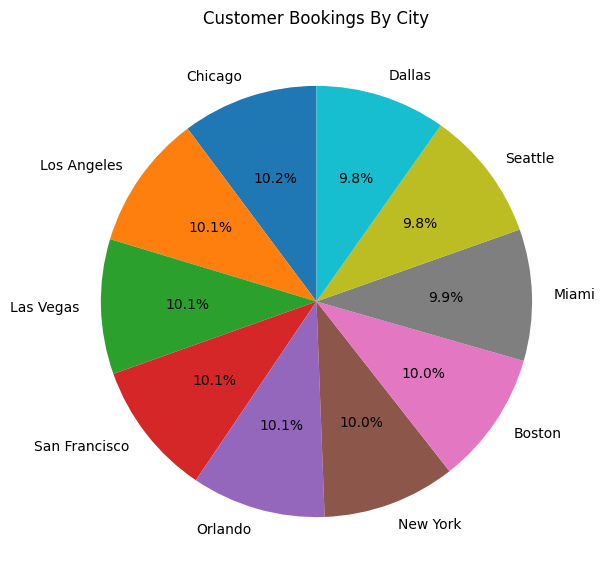

In [22]:
plt.figure(figsize=(7, 7))

plt.pie(
        customer_val,
        labels=customer_regionality,
        autopct = '%.1f%%',
       startangle=90,
       )
plt.title("Customer Bookings By City")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

# **Property booked by each Booking Channel (Pie Chart)**

In [24]:
channel_property_counts = (
    df.groupby("channel_of_booking")["property_id"]
      .count()
)

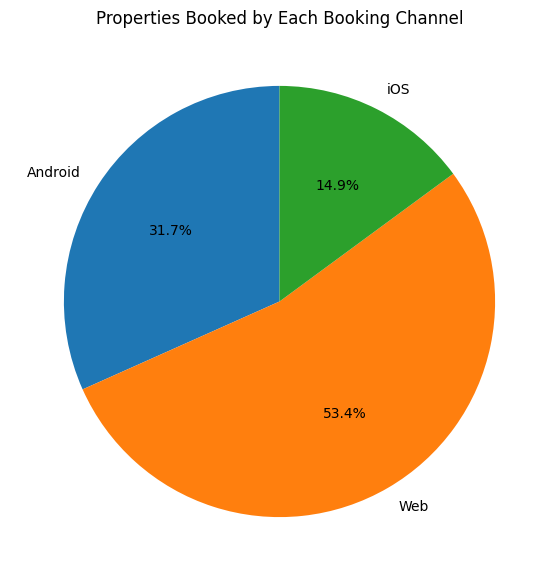

In [25]:
plt.figure(figsize=(7, 7))
plt.pie(
    channel_property_counts.values,
    labels=channel_property_counts.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Properties Booked by Each Booking Channel")
plt.show()

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

# **Property and their generated markups (PieChart)**|

In [27]:
property_markup = (
    df.groupby("property_id")["markup"]
      .sum()
      .sort_values(ascending=False)
)


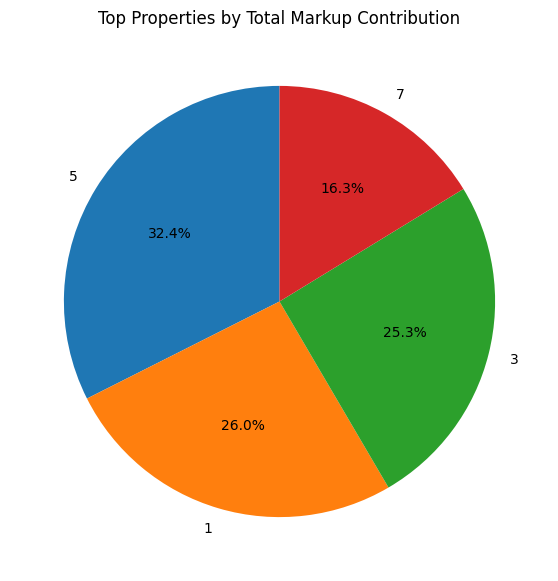

In [28]:
plt.figure(figsize=(7, 7))
plt.pie(
    property_markup.values,
    labels=property_markup.index.astype(str),
    autopct="%.1f%%",
    startangle=90
)
plt.title("Top Properties by Total Markup Contribution")
plt.show()


In [29]:
property_markup.head(10)


property_id
5    67750809
1    54320633
3    52859014
7    33969276
Name: markup, dtype: int64

# **Most Selected and Booked Property By Customers (Pie Chart)** 

In [30]:
customer_freq_bookedprop = df.groupby('property_id')['customer_id'].count().sort_values(ascending = False)

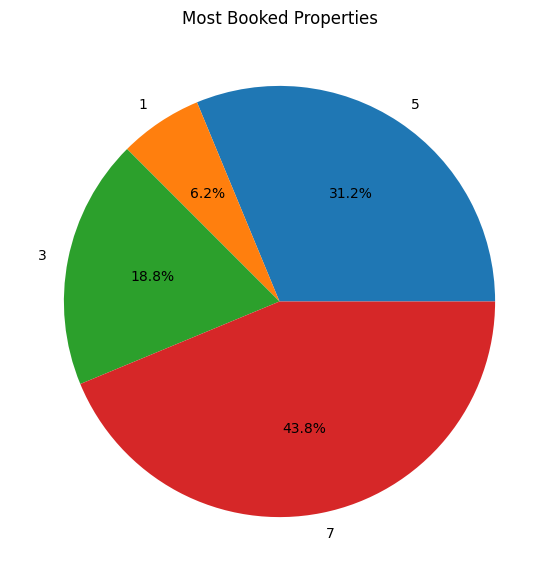

In [31]:
plt.figure(figsize = (7, 7))
plt.pie(customer_freq_bookedprop.index, 
       labels = customer_freq_bookedprop.index.astype(str),
       autopct = '%.1f%%')
plt.title('Most Booked Properties')
plt.show()

# **IDENTIFICATION OF 3 MEANINGFUL INSIGHTS**

#### **3 derived meaningful insights are :**
- Demand is highly diversified across all cities. (No Single City Dominance) ~ 9 - 10%
- Web Channel contributes to  almost exactly half of bookings done ~ 53%
- Revenue from Property (5) alone is 32% of the total markup
- Property (7) dominates bookings ~ 44%, but is not the top markup contributor generating 16% of the total markup.
- While demand and channels are evenly distributed, profitability is highly concentrated in a few properties, indicating strong opportunities for margin optimization rather than demand expansion

# **Booking Channel Analysis**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

In [33]:
channel_analysis = (
    df.groupby('booking_channel').agg(
        total_bookings = ('customer_id', 'count'),
        total_rev = ('booking_value', 'sum'),
        total_markup = ('markup', 'sum'),
        avg_booking_val = ('booking_value','mean'),
        avg_markup = ('markup', 'mean')
    ).sort_values('total_bookings', ascending = False)
)

# **BOOKING CHANNEL BASED : Total_Bookings**

In [34]:
channel_analysis

,total_bookings,total_rev,total_markup,avg_booking_val,avg_markup
booking_channel,,,,,
Web,15001,"422,890,794.22",104784520,"28,190.84","6,985.17"
Mobile App,12009,"256,407,590.16",83389308,"21,351.29","6,943.90"
Travel Agent,2990,"73,117,379.24",20725904,"24,453.97","6,931.74"


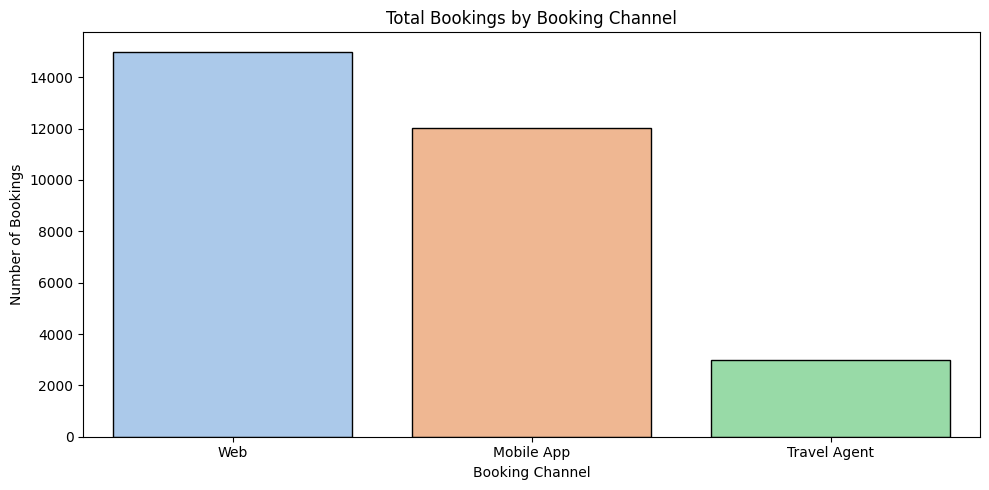

In [35]:
plt.figure(figsize=(10, 5))
barplot = sns.barplot (data = channel_analysis, x = channel_analysis.index, y = channel_analysis["total_bookings"],
                      palette = 'pastel', edgecolor = 'black')
plt.title("Total Bookings by Booking Channel")
plt.xlabel("Booking Channel")
plt.ylabel("Number of Bookings")
plt.tight_layout()
plt.show()

# **BOOKING CHANNEL BASED : Markup / Revenue Ratio**

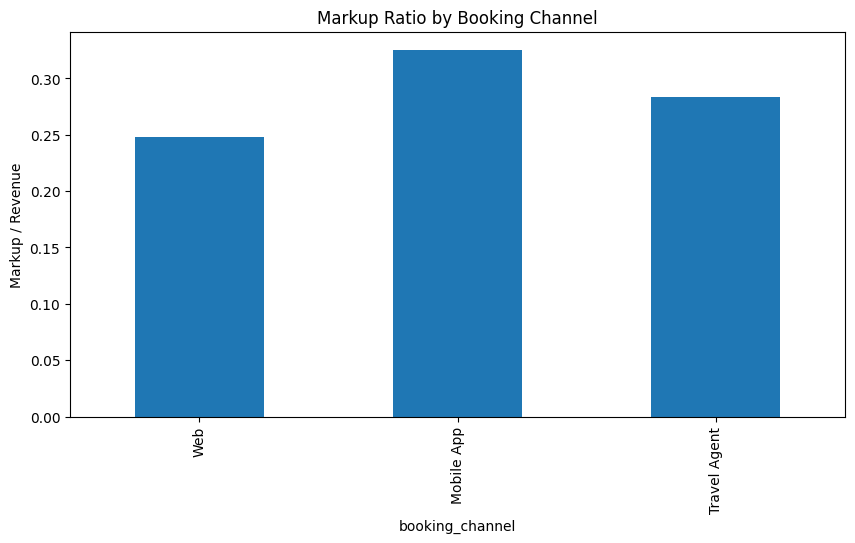

In [36]:
channel_analysis["markup_ratio"] = (
    channel_analysis["total_markup"] /
    channel_analysis["total_rev"]
)

channel_analysis["markup_ratio"].plot(
    kind="bar",
    title="Markup Ratio by Booking Channel",
    figsize=(10, 5)
)
plt.ylabel("Markup / Revenue")
plt.show()

# **Room Type Analysis**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

In [38]:
roomtype_analysis = (
    df.groupby('room_type').agg(
        total_bookings = ('customer_id', 'count'),
        num_rooms_booked = ('num_rooms_booked', 'sum'),
        total_markup = ('markup', 'sum'),
        cashback = ('cashback', 'count')
        ).sort_values('room_type', ascending = False)
)

# **ROOM TYPE BASED : Total_Bookings**

In [39]:
roomtype_analysis

,total_bookings,num_rooms_booked,total_markup,cashback
room_type,,,,
Suite,2970,4011,20727848,2970
Standard,16552,22396,115541785,16552
Deluxe,10478,14163,72630099,10478


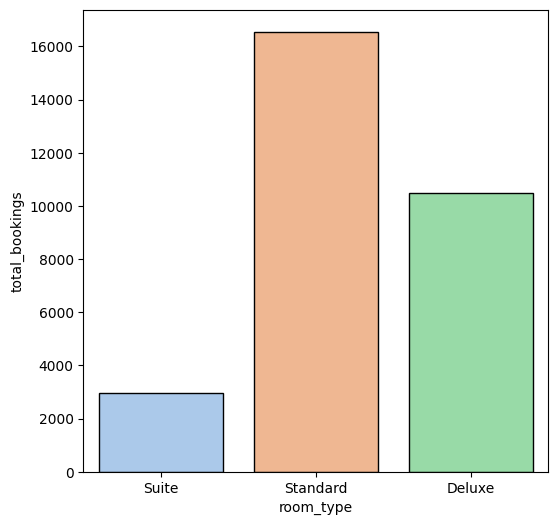

In [40]:
plt.figure(figsize = (6,6))
barplot = sns.barplot(data = roomtype_analysis, x = 'room_type', y = 'total_bookings', palette = 'pastel', edgecolor = 'black')

# **ROOM TYPE BASED : Total_Markup**

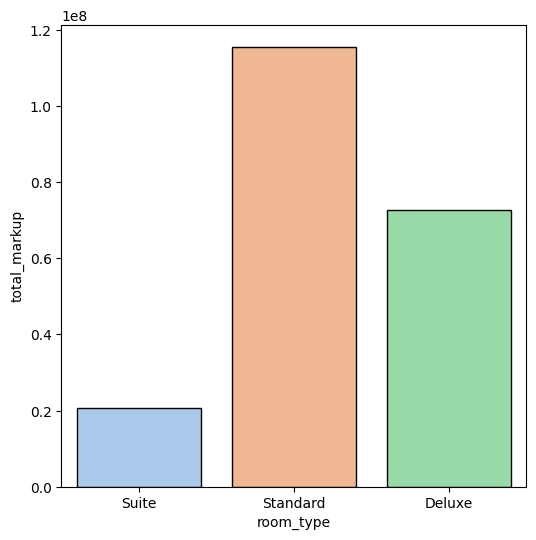

In [41]:
plt.figure(figsize = (6,6))
barplot = sns.barplot(data = roomtype_analysis, x = 'room_type', y = 'total_markup', palette = 'pastel', edgecolor = 'black')

# **ROOM TYPE BASED : Total_Cashback**

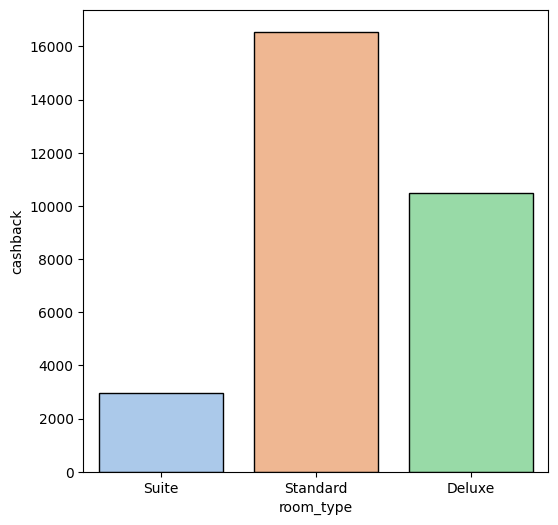

In [42]:
plt.figure(figsize = (6,6))
barplot = sns.barplot(data = roomtype_analysis, x = 'room_type', y = 'cashback', palette = 'pastel', edgecolor = 'black')

# **STAR Rating Analysis**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

In [44]:
df['star_rating'].value_counts().sort_index()

star_rating
2     2995
3    10460
4    12034
5     4511
Name: count, dtype: int64

# How does booking behavior differ across star ratings in terms of demand, revenue, and profitability?

In [45]:
starrate_analysis = (
    df.groupby('star_rating').agg(

         total_bookings=("customer_id", "count"),
          total_revenue=("booking_value", "sum"),
          total_markup=("markup", "sum"),
          avg_booking_value=("booking_value", "mean"),
          avg_markup=("markup", "mean")
      )
      .sort_index() 
)



In [46]:
starrate_analysis

,total_bookings,total_revenue,total_markup,avg_booking_value,avg_markup
star_rating,,,,,
2,2995,"74,443,180.05",20884715,"24,855.82","6,973.19"
3,10460,"263,692,078.52",73193578,"25,209.57","6,997.47"
4,12034,"300,977,843.63",83744786,"25,010.62","6,959.01"
5,4511,"113,302,661.42",31076653,"25,116.97","6,889.08"


# Mass Market Demand 

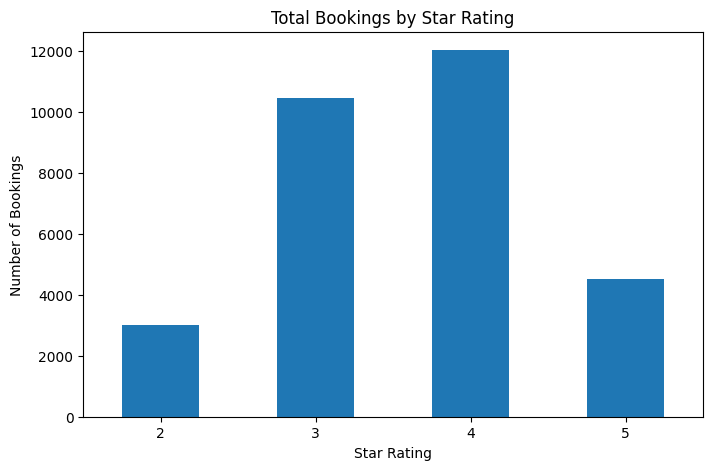

In [47]:
plt.figure(figsize=(8, 5))
starrate_analysis["total_bookings"].plot(kind="bar")
plt.title("Total Bookings by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.show()

# Volume–value trade-off.

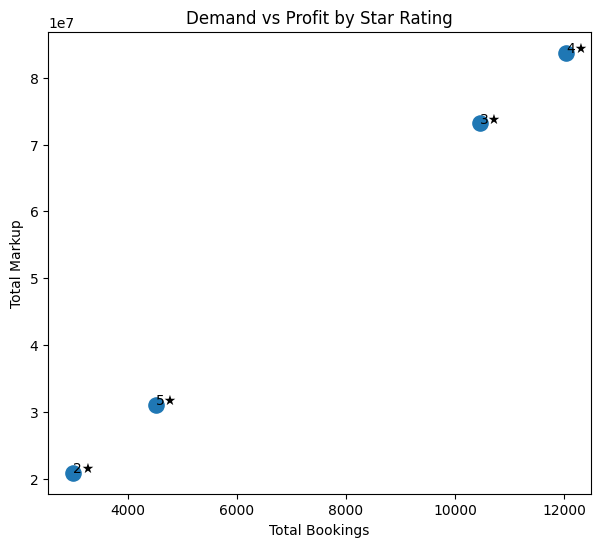

In [48]:
plt.figure(figsize=(7, 6))
plt.scatter(
    starrate_analysis["total_bookings"],
    starrate_analysis["total_markup"],
    s=120
)

for rating in starrate_analysis.index:
    plt.annotate(
        f"{rating}★",
        (
            starrate_analysis.loc[rating, "total_bookings"],
            starrate_analysis.loc[rating, "total_markup"]
        )
    )

plt.xlabel("Total Bookings")
plt.ylabel("Total Markup")
plt.title("Demand vs Profit by Star Rating")
plt.show()


# **Cancellation Behaviour** 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

In [50]:
total_bookings = len(df)
total_bookings
cancelled_bookings = (df['booking_status'] == 'Cancelled').sum()
cancellation_rate = cancelled_bookings / total_bookings

In [51]:
print('Total Bookings :', total_bookings)
print('Cancelled Bookings :',cancelled_bookings)
print('Cancellation Rate :', total_bookings / cancelled_bookings)

Total Bookings : 30000
Cancelled Bookings : 6070
Cancellation Rate : 4.942339373970346


In [52]:
success_bookings = total_bookings - cancelled_bookings

In [53]:
success_bookings

23930

# Which property has faced maximum cancellations?

In [54]:
cancelled_df = df[df['booking_status'].isin(['Confirmed','Cancelled'])]

In [55]:
cancelled_df

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,25342,PayPal,Yes,369.65,Web,Confirmed,2024-03-04,5.37,0.00,No
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,8033,Bank Transfer,Yes,492.51,Web,Confirmed,2024-07-19,7.16,0.00,No
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,29715,Debit Card,Yes,0.00,iOS,Confirmed,2024-03-22,0.00,0.00,No
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,44592,Bank Transfer,Yes,545.54,Android,Confirmed,2024-11-24,7.93,24.50,Yes
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,15873,Debit Card,Yes,211.37,Web,Cancelled,2024-03-02,0.00,0.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,91,5,Boston,4,2025-04-29,2025-05-23,2025-05-24,Standard,1,Business,...,23365,Debit Card,Yes,286.66,Web,Confirmed,2024-10-05,0.00,0.00,No
29996,432,5,Los Angeles,4,2025-04-29,2025-06-24,2025-06-25,Deluxe,1,Leisure,...,22047,Bank Transfer,Yes,918.26,iOS,Confirmed,2024-10-22,0.00,0.00,No
29997,15,5,Boston,5,2025-04-29,2025-06-17,2025-06-20,Standard,1,Leisure,...,26321,PayPal,Yes,417.02,iOS,Confirmed,2024-10-22,0.00,2.58,Yes
29998,73,1,San Francisco,3,2025-04-29,NaN,NaN,Standard,1,Business,...,20806,Bank Transfer,Yes,468.35,Android,Cancelled,2024-10-15,6.81,0.00,No


In [56]:
# Keeping Only cancelled df

cancelled_df = df[df['booking_status'] == 'Cancelled']

In [57]:
cancelled_df

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,15873,Debit Card,Yes,211.37,Web,Cancelled,2024-03-02,0.00,0.00,No
7,336,1,Dallas,4,2024-04-01,NaN,NaN,Suite,1,Leisure,...,13631,Credit Card,Yes,180.12,Web,Cancelled,2024-11-19,2.62,4.12,Yes
24,362,3,Boston,5,2024-04-01,NaN,NaN,Deluxe,1,Business,...,31656,Bank Transfer,Yes,302.22,Android,Cancelled,2024-03-05,4.39,0.00,No
28,389,5,New York,4,2024-04-01,NaN,NaN,Standard,1,Business,...,16470,Credit Card,Yes,0.00,Web,Cancelled,2024-11-25,0.00,13.80,Yes
31,375,5,Orlando,4,2024-04-01,NaN,NaN,Standard,1,Business,...,35930,Credit Card,Yes,0.00,Web,Cancelled,2024-10-28,0.00,23.14,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,88,7,Boston,4,2025-04-29,NaN,NaN,Deluxe,1,Leisure,...,15249,Credit Card,Yes,888.66,Web,Cancelled,2024-10-13,0.00,0.00,No
29987,293,5,Miami,4,2025-04-29,NaN,NaN,Deluxe,1,Leisure,...,18309,Credit Card,No,0.00,Web,Cancelled,2024-10-21,0.00,0.00,No
29992,93,5,Las Vegas,5,2025-04-29,2025-06-13,2025-06-14,Suite,1,Business,...,12346,Credit Card,Yes,887.01,Web,Cancelled,2024-10-03,0.00,0.00,No
29993,195,5,New York,4,2025-04-29,NaN,NaN,Standard,1,Leisure,...,7380,Bank Transfer,Yes,"1,154.30",Android,Cancelled,2024-10-25,0.00,0.00,No


In [58]:
cancelled_status = cancelled_df['booking_status'].value_counts()

In [59]:
propcancel = (
    cancelled_df.groupby("property_id")['booking_status'].count()
      .sort_values(ascending=False)
)


In [60]:
propcancel

property_id
5    1926
1    1591
3    1586
7     967
Name: booking_status, dtype: int64

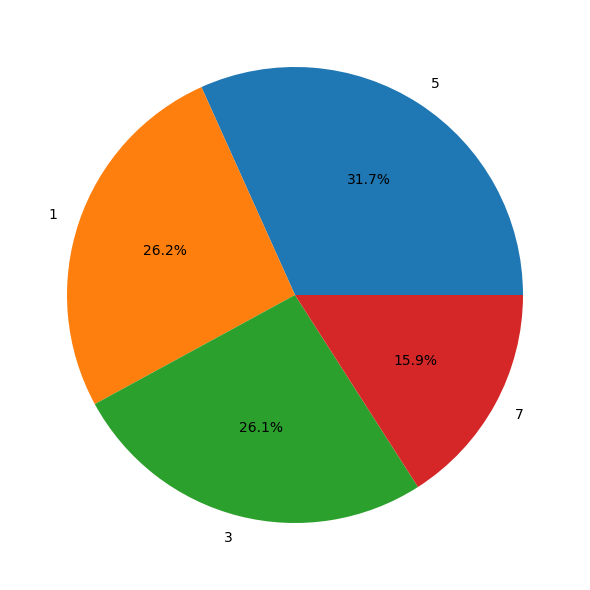

In [61]:
plt.figure(figsize = (6,6))
plt.pie(propcancel.values , labels = propcancel.index, autopct = '%.1f%%')
plt.tight_layout()
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

# Which City has the most cancellation rates?

In [63]:
cancelled_df

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,15873,Debit Card,Yes,211.37,Web,Cancelled,2024-03-02,0.00,0.00,No
7,336,1,Dallas,4,2024-04-01,NaN,NaN,Suite,1,Leisure,...,13631,Credit Card,Yes,180.12,Web,Cancelled,2024-11-19,2.62,4.12,Yes
24,362,3,Boston,5,2024-04-01,NaN,NaN,Deluxe,1,Business,...,31656,Bank Transfer,Yes,302.22,Android,Cancelled,2024-03-05,4.39,0.00,No
28,389,5,New York,4,2024-04-01,NaN,NaN,Standard,1,Business,...,16470,Credit Card,Yes,0.00,Web,Cancelled,2024-11-25,0.00,13.80,Yes
31,375,5,Orlando,4,2024-04-01,NaN,NaN,Standard,1,Business,...,35930,Credit Card,Yes,0.00,Web,Cancelled,2024-10-28,0.00,23.14,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,88,7,Boston,4,2025-04-29,NaN,NaN,Deluxe,1,Leisure,...,15249,Credit Card,Yes,888.66,Web,Cancelled,2024-10-13,0.00,0.00,No
29987,293,5,Miami,4,2025-04-29,NaN,NaN,Deluxe,1,Leisure,...,18309,Credit Card,No,0.00,Web,Cancelled,2024-10-21,0.00,0.00,No
29992,93,5,Las Vegas,5,2025-04-29,2025-06-13,2025-06-14,Suite,1,Business,...,12346,Credit Card,Yes,887.01,Web,Cancelled,2024-10-03,0.00,0.00,No
29993,195,5,New York,4,2025-04-29,NaN,NaN,Standard,1,Leisure,...,7380,Bank Transfer,Yes,"1,154.30",Android,Cancelled,2024-10-25,0.00,0.00,No


In [64]:
cancelcity = cancelled_df.groupby('city')['booking_status'].size().reset_index(name = 'cancel_count').sort_values(by='cancel_count',ascending = True)

In [65]:
cancelcity

,city,cancel_count
9,Seattle,570
2,Dallas,587
5,Miami,601
8,San Francisco,603
0,Boston,604
6,New York,608
3,Las Vegas,615
7,Orlando,618
1,Chicago,628
4,Los Angeles,636


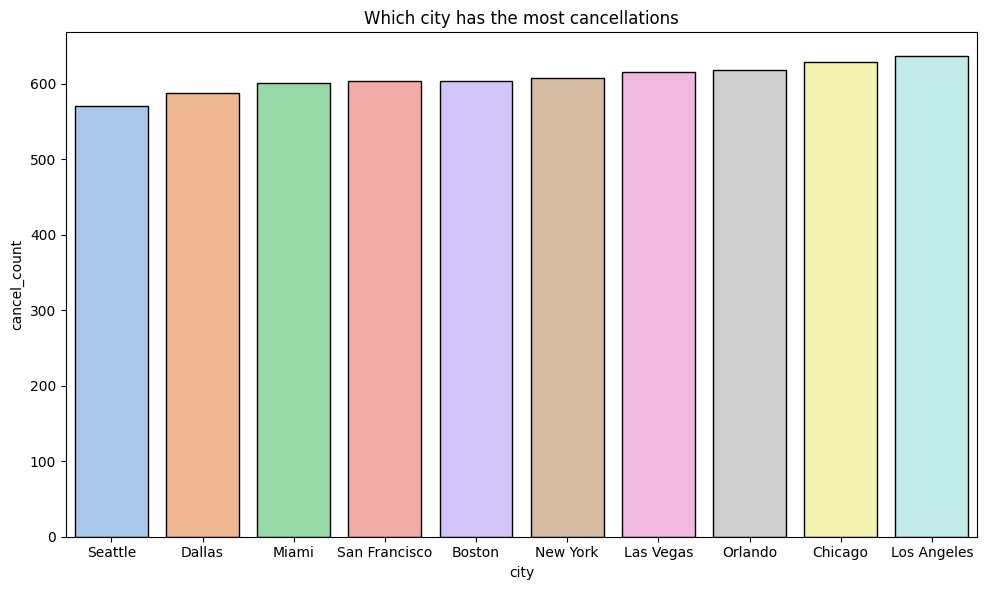

In [66]:
# Now we'll try to visualize this statement into a barplot. 

plt.figure(figsize = (10,6))
barplot = sns.barplot(data = cancelcity,
                     x = 'city',
                     y = 'cancel_count',
                     palette = 'pastel',
                     edgecolor = 'black',
                     )
plt.title('Which city has the most cancellations')
plt.tight_layout()
plt.show()

# Daily Cancel Trends 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

In [68]:
survey = (
    cancelled_df.groupby('travel_date')
    .size()
    .reset_index(name='cancel_count')
)

In [69]:
survey

,travel_date,cancel_count
0,2024-03-02,2
1,2024-03-05,2
2,2024-03-06,2
3,2024-03-07,3
4,2024-03-08,2
...,...,...
320,2025-01-20,2
321,2025-01-21,1
322,2025-01-23,1
323,2025-01-24,1


In [76]:
cancelled_df['booking_date'] = pd.to_datetime(cancelled_df['booking_date'])

In [77]:
daily_cancel_trend = cancelled_df.groupby('booking_date')['booking_status'].count().reset_index(name ='cancel_tickets')

In [78]:
daily_cancel_trend

,booking_date,cancel_tickets
0,2024-04-01,15
1,2024-04-02,13
2,2024-04-03,13
3,2024-04-04,12
4,2024-04-05,11
...,...,...
389,2025-04-25,5
390,2025-04-26,12
391,2025-04-27,13
392,2025-04-28,15


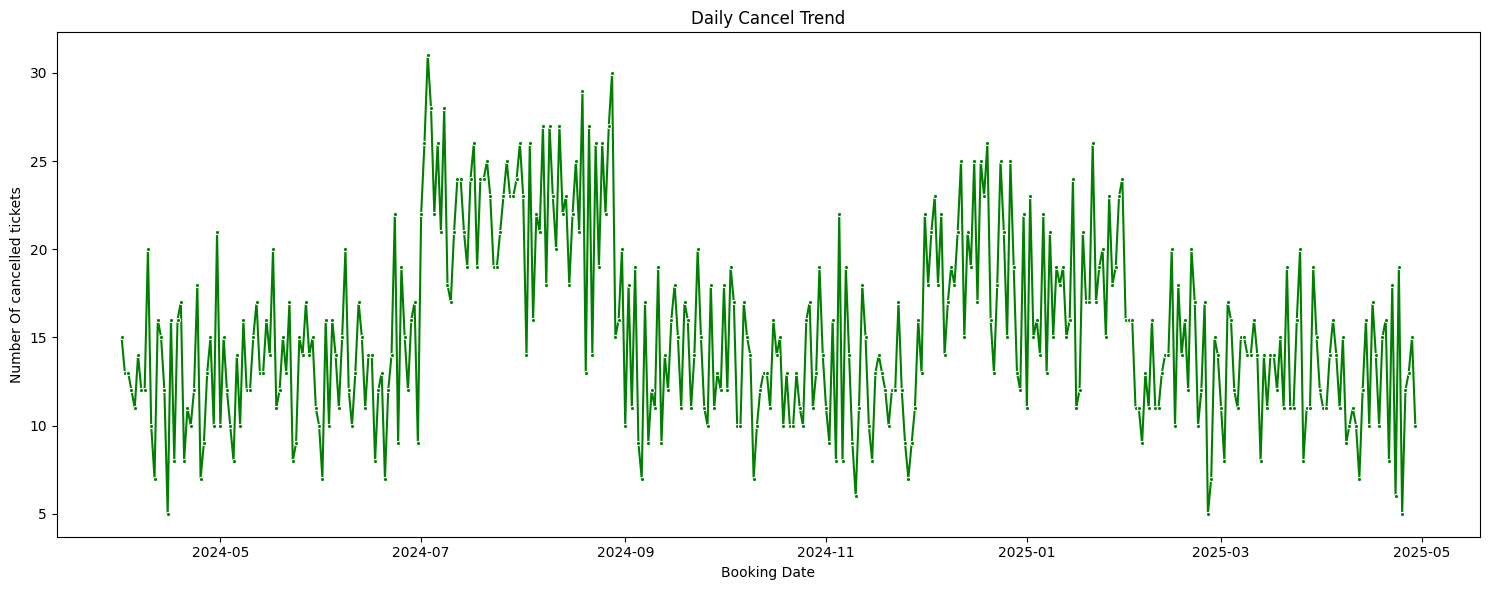

In [80]:
#Plotting a line chart for daily cancel trend

plt.figure(figsize=(15,6))
sns.lineplot(data=daily_cancel_trend, x = 'booking_date', y = 'cancel_tickets', marker = '.', color = 'green')
plt.title('Daily Cancel Trend')
plt.xlabel('Booking Date')
plt.ylabel('Number Of cancelled tickets')
plt.tight_layout()
plt.show()

#  Monthly Cancel Trends

In [102]:
cancelled_df['months'] = cancelled_df['booking_date'].dt.month_name()

In [107]:
monthly_cancel_trend = cancelled_df.groupby('months')['booking_status'].count().reindex(['January','February', 'March', 'April', 'May', 'June', 'July', 'August','September',
                                                                         'October', 'November', 'December']).reset_index()

In [108]:
month_names = cancelled_df['booking_date'].value_counts()

In [109]:
month_names

booking_date
2024-07-03    31
2024-08-28    30
2024-08-19    29
2024-07-04    28
2024-07-08    28
              ..
2024-11-10     6
2025-04-23     6
2024-04-15     5
2025-04-25     5
2025-02-25     5
Name: count, Length: 394, dtype: int64

In [110]:
monthly_cancel_trend

,months,booking_status
0,January,559
1,February,373
2,March,415
3,April,733
4,May,408
5,June,400
6,July,716
7,August,679
8,September,405
9,October,410


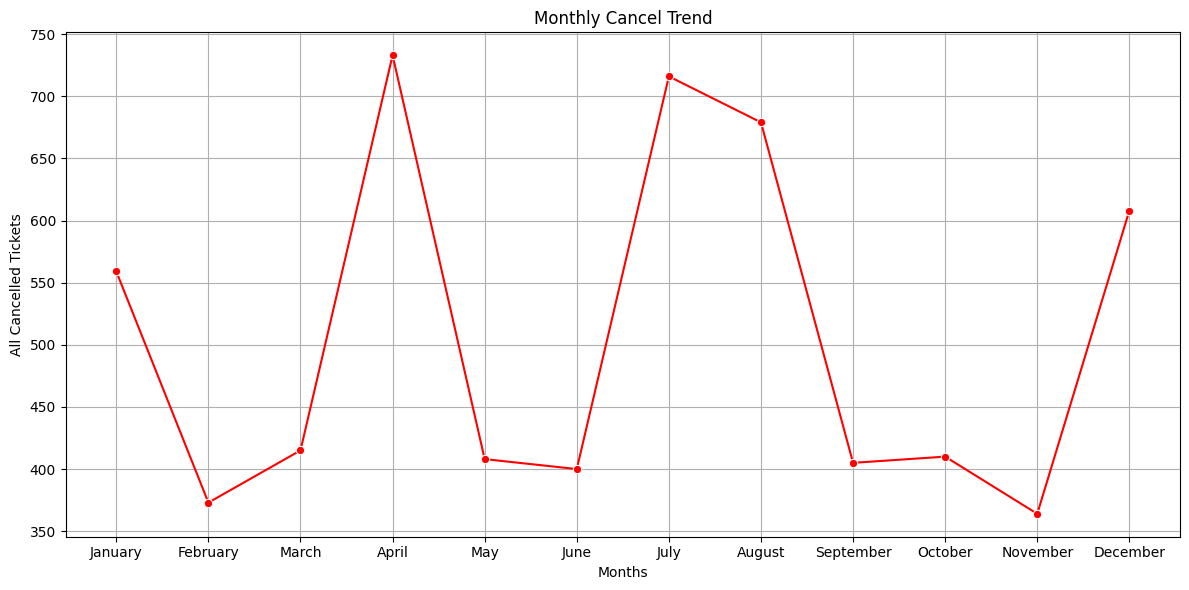

In [111]:
# Plotting a line plot for Monthly Cancel Trends
plt.figure(figsize = (12,6))
sns.lineplot(data = monthly_cancel_trend, x = 'months', y = 'booking_status', color = 'red', marker = 'o')
plt.title('Monthly Cancel Trend')
plt.xlabel('Months')
plt.ylabel('All Cancelled Tickets')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Weekly Cancel Trends**

In [112]:
cancelled_df['dayofweek'] = cancelled_df['booking_date'].dt.day_name()

In [117]:
weekly_cancel_trend = cancelled_df.groupby('dayofweek')['booking_status'].count().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

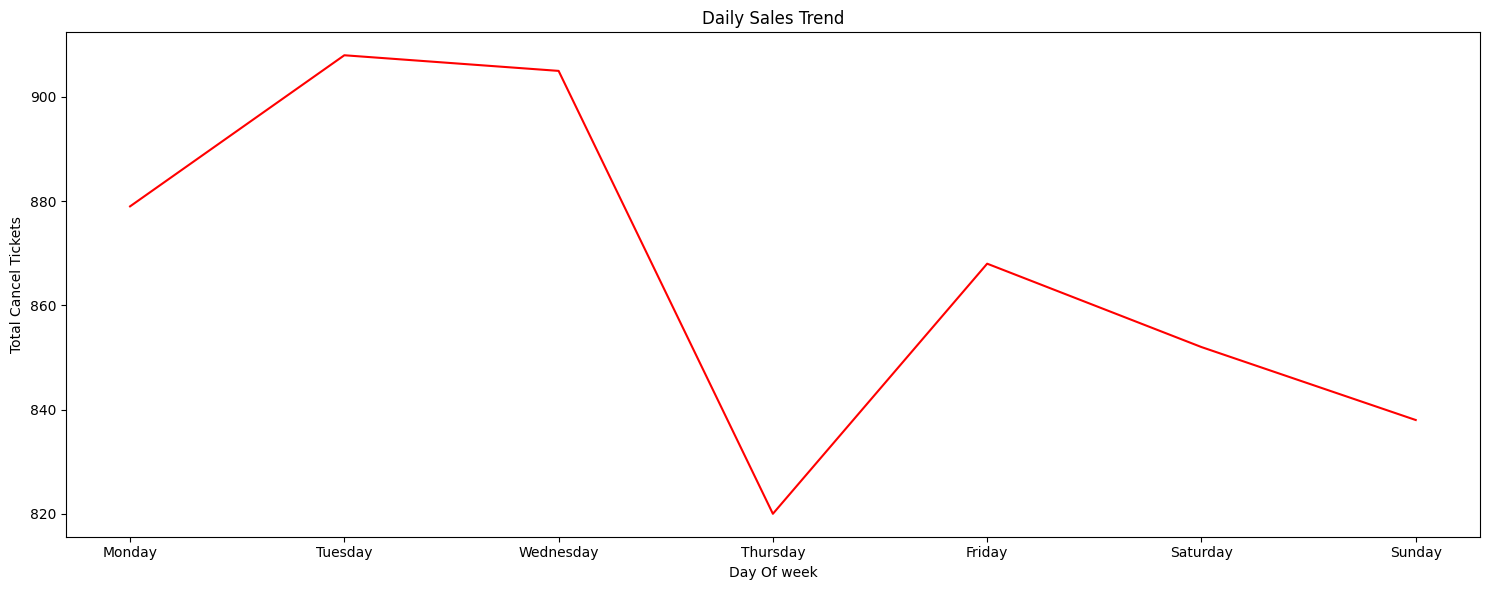

In [121]:
#Plotting a line chart for weekly cancel trend

plt.figure(figsize=(15,6))
sns.lineplot(data=weekly_cancel_trend, x = 'dayofweek', y = 'booking_status', marker = '', color = 'red')
plt.title('Daily Sales Trend')
plt.xlabel('Day Of week')
plt.ylabel('Total Cancel Tickets')
plt.tight_layout()
plt.show()

# **Key Observations**

### **1) Meaningful Trends & Patterns**

Trend 1 — Concentration of Bookings in Select Cities & Properties
Booking volume is not evenly distributed. A limited set of cities and hotel properties account for a disproportionately high share of total reservations, indicating demand clustering around high-visibility or high-inventory locations.

Trend 2 — Strong Temporal Seasonality
Monthly booking analysis shows clear peaks during specific travel seasons (holiday periods and vacation months), while off-season months record visibly lower reservation activity. This confirms demand cyclicality typical of the travel sector.

Trend 3 — Weekday vs Weekend Booking Behavior
Weekly distribution reveals higher booking activity toward weekends and late-week days, reflecting leisure travel dominance over business travel in the dataset.

### **2) Variation Across Channels, Room Types & Star Ratings**
#### **Booking Channels**

- Online travel agencies (OTAs) and digital platforms generate the largest booking share.

- Direct or offline channels contribute less volume but often reflect more intentional bookings.

- Interpretation:
Customers prefer price comparison convenience and promotional visibility offered by aggregators.

#### **Room Types**

- Standard and mid-tier room categories dominate bookings.

- Premium/luxury room segments show lower booking frequency but higher per-booking value.

- Interpretation:
Mass demand is price-sensitive, while luxury demand is niche but revenue-dense.

#### **Star Ratings**

- 3-star and 4-star hotels attract the highest booking volume.

- 5-star properties receive comparatively fewer bookings.

- Interpretation:
Customers balance affordability with comfort — mid-scale hospitality drives core demand.

### **3) Root Cause Analysis**

- Flexible Cancellation Policies
Platforms and properties offering free cancellation windows encourage speculative bookings.

- Price Sensitivity & Deal Hunting
Customers often reserve early at one property while continuing to search for better deals.

- Travel Plan Uncertainty
External factors — visa delays, work schedules, health issues — contribute to booking reversals.

### **4) Why Some Channels Perform Better**

#### **High Performing Channels:**

- Strong digital presence

- Discount bundling

- Loyalty integrations

#### **Lower Performing Channels:**

- Limited price comparison

- Lower promotional reach

### **5) Seasonal / Temporal Influence on Bookings & Stay Length**

#### **Seasonality Observed:**

- Vacation months → Higher bookings & longer stays

- Off-season → Shorter stays & fewer reservations

#### **Holiday Period Impact:**

- Festivals and school holidays increase family travel.

- Corporate travel peaks mid-week but is shorter in duration.

- Pricing Interaction:
Peak season pricing does not deter bookings significantly due to demand urgency.

### **6) Business Recommendations**
#### **- Strategies to Reduce Cancellations**

- Policy Optimization

- Introduce partial cancellation fees after a cutoff date.

- Offer non-refundable discounted rates.

- Deposit Requirements

- Advance payment increases booking commitment.

- Reminder & Engagement Systems

- Pre-stay confirmations via email/SMS reduce no-shows and cancellations.

#### **- Improving Profitability & Repeat Bookings**

- Loyalty Programs

- Reward repeat stays with discounts or upgrades.

- Personalized Offers

- Use past booking behavior to target customers.

- Bundled Services

- Combine stay + meals + transport for higher perceived value.

- Dynamic Pricing

- Adjust rates based on seasonality and demand forecasts.







